In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving LTOTALNSA.csv to LTOTALNSA.csv


In [ ]:
df = pd.read_csv("LTOTALNSA.csv")

In [ ]:
df.head()

,DATE,LTOTALNSA
0,1976-01-01,864.6
1,1976-02-01,973.3
2,1976-03-01,1216.1
3,1976-04-01,1163.2
4,1976-05-01,1176.1


In [ ]:
df["DATE"] = pd.to_datetime(df["DATE"])
df.set_index("DATE", inplace = True)

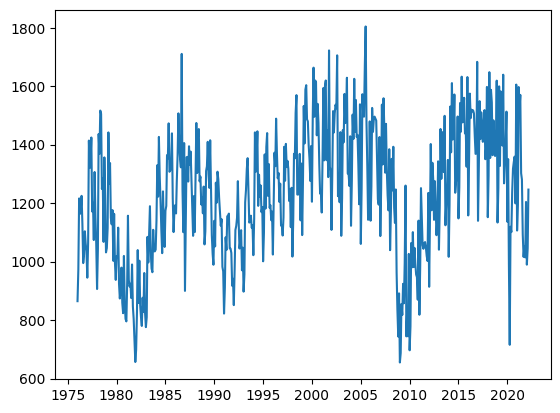

In [ ]:
plt.plot(df)

<Axes: xlabel='DATE', ylabel='LTOTALNSA'>

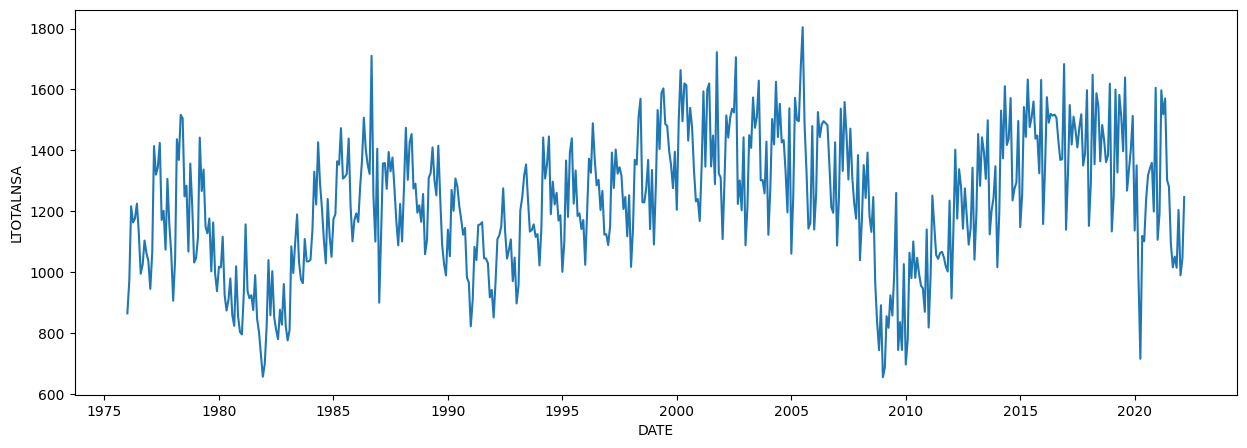

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(df["LTOTALNSA"]) # 변동성이 크니까 yearly로 바꿔줘야함

In [ ]:
# MOVING AVERAGE 사용
yearly_df = df.resample(rule = "Y").mean() # monthly to yearly

<ipython-input-13-a10d54cd8b04>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = df.resample(rule = "Y").mean() # monthly to yearly


In [ ]:
yearly_df.head() # yearly로 나옴

,LTOTALNSA
DATE,
1976-12-31,1080.816667
1977-12-31,1206.825000
1978-12-31,1248.416667
1979-12-31,1146.533333
1980-12-31,933.125000


<Axes: xlabel='DATE', ylabel='LTOTALNSA'>

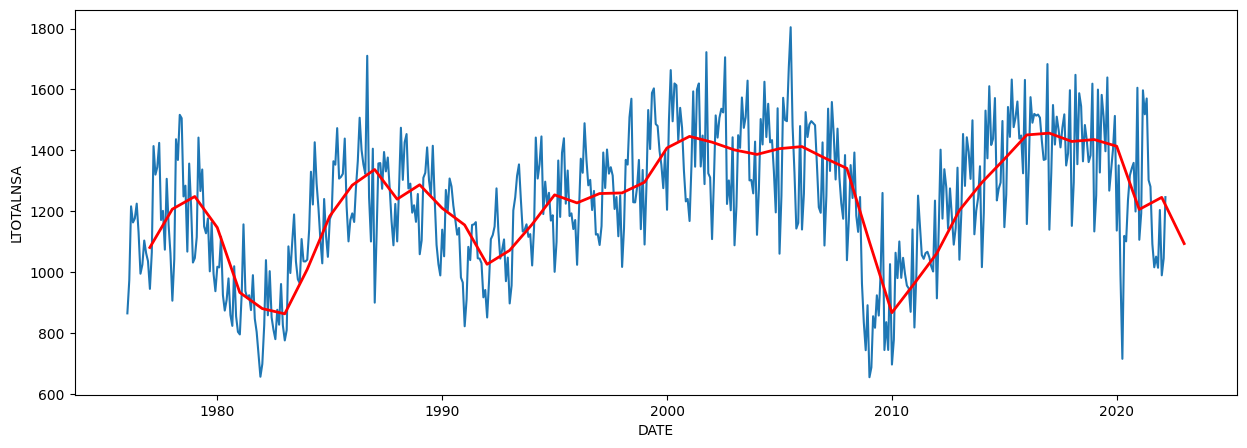

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(df["LTOTALNSA"])
sns.lineplot(yearly_df["LTOTALNSA"], c = "r", linewidth = 2) # smoothing해줌 ! 미분가능하게 하려면 연속적이고 스무드해야하니까

shifting을 해보겠다

오늘의 삼성주가는 어제에 영향받는다

**따라서**
auto-regression 을 극복하기 위해

사실 shift보단 lag다.

최저임금 상승, 물가 상승 -> lag가 있음 바로 내 임금이 오르지 않음

In [ ]:
df["shift_1"] = df["LTOTALNSA"].shift(1)

In [ ]:
df.head() # 864.0이 밑으로 내려옴

,LTOTALNSA,shift_1
DATE,,
1976-01-01,864.6,NaN
1976-02-01,973.3,864.6
1976-03-01,1216.1,973.3
1976-04-01,1163.2,1216.1
1976-05-01,1176.1,1163.2


In [ ]:
df["shift_2"] = df["LTOTALNSA"].shift(2)

In [ ]:
df.head()

,LTOTALNSA,shift_1,shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


In [ ]:
quarterly_df = df.resample(rule = "Q").mean() # moving avg에 쓰려고
quarterly_df.head()

<ipython-input-23-c71c562f26d0>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_df = df.resample(rule = "Q").mean()


,LTOTALNSA,shift_1,shift_2
DATE,,,
1976-03-31,1018.000000,918.950000,864.600000
1976-06-30,1188.066667,1185.133333,1117.533333
1976-09-30,1049.966667,1116.633333,1177.033333
1976-12-31,1067.233333,1063.533333,1041.166667
1977-03-31,1141.466667,1015.466667,1014.333333


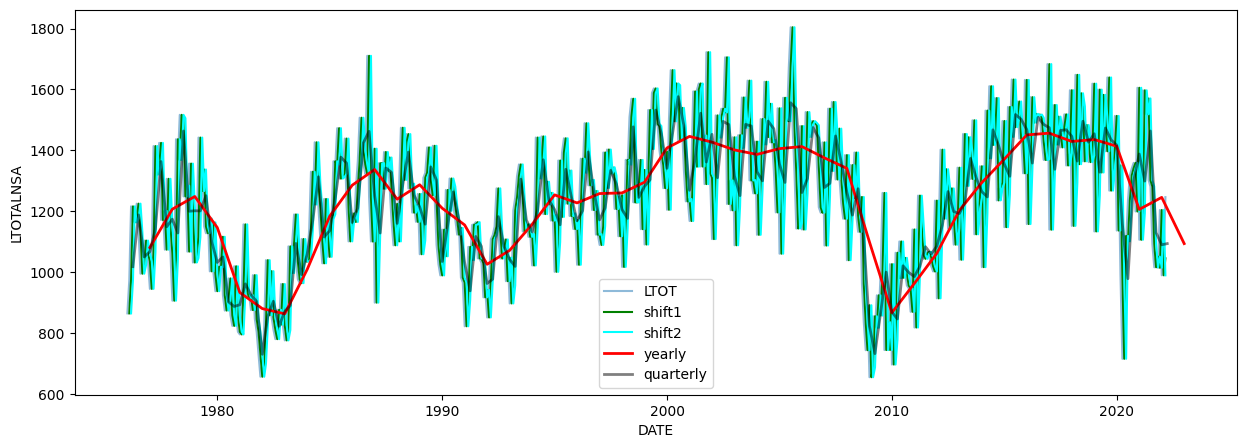

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(df["LTOTALNSA"], label = "LTOT", alpha = 0.5)
sns.lineplot(df["shift_1"], c = "green", label = "shift1")
sns.lineplot(df["shift_2"], c = "cyan", label = "shift2")
sns.lineplot(yearly_df["LTOTALNSA"], c = "r", linewidth = 2, label = "yearly")
sns.lineplot(quarterly_df["LTOTALNSA"], c = "k", linewidth = 2, label = "quarterly", alpha = 0.5) # alpha 는 투명도 50%
plt.legend()

moving average(rolling) 를 그려보겠다 using quarterly_df

In [ ]:
df_rolling = df.copy() # 복제

In [ ]:
df_rolling["quarterly_rolling"] = df_rolling["LTOTALNSA"].rolling(window = 3).mean()
 # 분기별로 rolling을 하겠다. 그 단위는 window = 석달(한 분기는 3달이니까). 저마다의 평균을 보겠다. semi yearly = 6. 평균치는 3월째에 입력됨

In [ ]:
df_rolling.head()

,LTOTALNSA,shift_1,shift_2,quarterly_rolling
DATE,,,,
1976-01-01,864.6,NaN,NaN,NaN
1976-02-01,973.3,864.6,NaN,NaN
1976-03-01,1216.1,973.3,864.6,1018.000000
1976-04-01,1163.2,1216.1,973.3,1117.533333
1976-05-01,1176.1,1163.2,1216.1,1185.133333


In [ ]:
(864.3 + 973.3 + 1216.1) / 3 #맞게 나옴

1017.9

In [ ]:
(1163.2 + 973.3 + 1216.1) / 3

1117.5333333333333

In [ ]:
df_rolling["yearly_rolling"] = df_rolling["LTOTALNSA"].rolling(window = 12).mean() # 한달치 하고싶다

In [ ]:
df_rolling

,LTOTALNSA,shift_1,shift_2,quarterly_rolling,yearly_rolling
DATE,,,,,
1976-01-01,864.600,NaN,NaN,NaN,NaN
1976-02-01,973.300,864.600,NaN,NaN,NaN
1976-03-01,1216.100,973.300,864.600,1018.000000,NaN
1976-04-01,1163.200,1216.100,973.300,1117.533333,NaN
1976-05-01,1176.100,1163.200,1216.100,1185.133333,NaN
...,...,...,...,...,...
2021-11-01,1014.411,1051.015,1015.935,1027.120333,1279.039750
2021-12-01,1203.993,1014.411,1051.015,1089.806333,1245.581083
2022-01-01,989.560,1203.993,1014.411,1069.321333,1235.853917


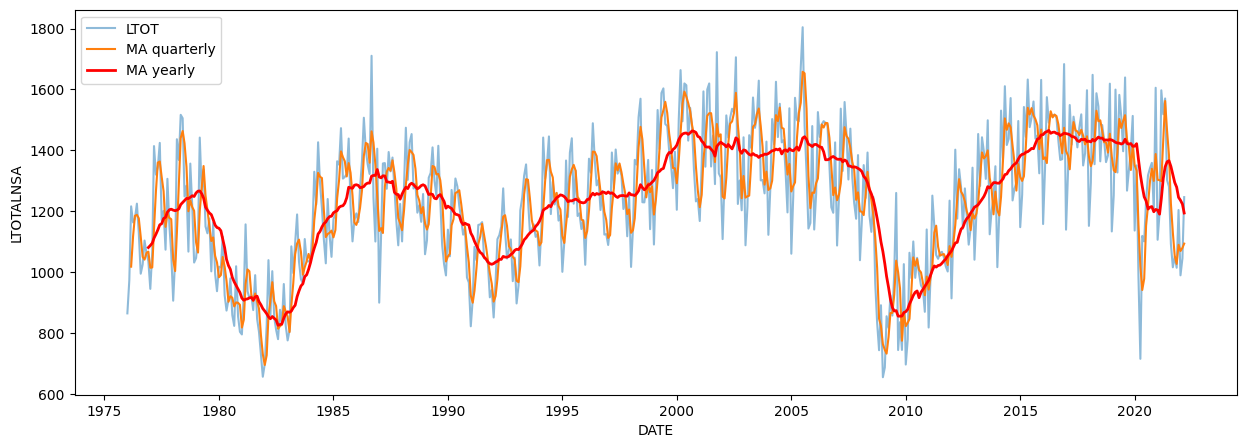

In [ ]:
plt.figure(figsize = (15, 5))
sns.lineplot(df_rolling["LTOTALNSA"], label = "LTOT", alpha = 0.5)
sns.lineplot(df_rolling["quarterly_rolling"], label = "MA quarterly")
sns.lineplot(df_rolling["yearly_rolling"], label = "MA yearly", c = "red", linewidth = 2)
plt.legend()
plt.show()

stationary 한지 체크

dick fuller test

어떤 구역에서의 평균과 표준편차가 같다. 점프하지 않고

null hypothesis 귀무가설 : stationary 하지 않다.
p_value 가 0.05 이하면 reject

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df["LTOTALNSA"])

(-2.7935492716414294,
 0.05920113309420928,
 17,
 537,
 {'1%': -3.4425861905056556,
  '5%': -2.8669372502674824,
  '10%': -2.5696445454608505},
 6554.996554755519)

-2.79는 critical value 기각역이다.

-2.79 < threshold_0.05 여야 reject

threshold가 5% : -2.866

-2.79 > -2.866 -> 크다! = stationary한 데이터로 바꿔줘야함

전이랑 후를 비교하면서 정상성을 맞춰

cpi도 기본적으로 non stationary

이처럼 stationary 인것처럼 보여도 무조건 테스트 돌려야함 체크 필수

바꿀 때 taylor method로 log difference 사용

{(X_2024 - X_2025) / X_2024}\

lnX_2024 - lnX_2025 와 같다.

In [ ]:
df_diff = df.copy()

In [ ]:
df_diff["diff_1"] = df_diff["LTOTALNSA"].diff(periods = 1)
df_diff["diff_2"] = df_diff["LTOTALNSA"].diff(periods = 2)

In [ ]:
df_diff

,LTOTALNSA,shift_1,shift_2,diff_1,diff_2
DATE,,,,,
1976-01-01,864.600,NaN,NaN,NaN,NaN
1976-02-01,973.300,864.600,NaN,108.700,NaN
1976-03-01,1216.100,973.300,864.600,242.800,351.500
1976-04-01,1163.200,1216.100,973.300,-52.900,189.900
1976-05-01,1176.100,1163.200,1216.100,12.900,-40.000
...,...,...,...,...,...
2021-11-01,1014.411,1051.015,1015.935,-36.604,-1.524
2021-12-01,1203.993,1014.411,1051.015,189.582,152.978
2022-01-01,989.560,1203.993,1014.411,-214.433,-24.851


In [ ]:
973.3 - 864.6 # diff1

108.69999999999993

In [ ]:
1216 - 864.6 # diff2

351.4

In [ ]:
adfuller(df_diff["diff_1"][1:]) # [1:] 0번째에 nan있어서 1부터. 그래서 stationary 하다는 결론. 그때부터 분석에 들어감

(-5.169536504639879,
 1.0142470277371382e-05,
 16,
 537,
 {'1%': -3.4425861905056556,
  '5%': -2.8669372502674824,
  '10%': -2.5696445454608505},
 6549.204918861316)

In [ ]:
adfuller(df_diff["diff_2"][2:]) # 둘다 threshold보다 작으니까 stationary하다.

(-7.066076669480652,
 5.076698579864715e-10,
 12,
 540,
 {'1%': -3.442517884424376,
  '5%': -2.8669071815780116,
  '10%': -2.5696285219478736},
 6548.379961347793)

In [ ]:
df_diff.head()

,LTOTALNSA,shift_1,shift_2,diff_1,diff_2
DATE,,,,,
1976-01-01,864.6,NaN,NaN,NaN,NaN
1976-02-01,973.3,864.6,NaN,108.7,NaN
1976-03-01,1216.1,973.3,864.6,242.8,351.5
1976-04-01,1163.2,1216.1,973.3,-52.9,189.9
1976-05-01,1176.1,1163.2,1216.1,12.9,-40.0


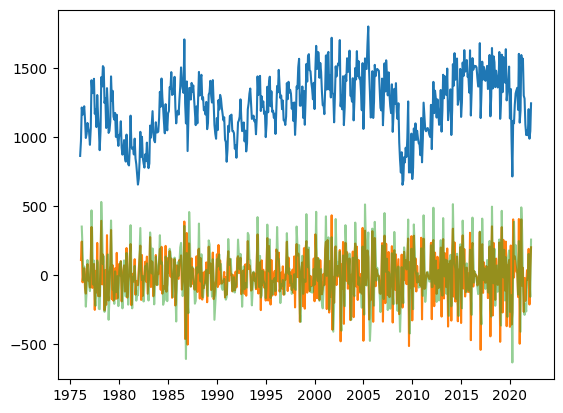

In [ ]:
# 시험
plt.plot(df_diff["LTOTALNSA"])
plt.plot(df_diff["diff_1"])
plt.plot(df_diff["diff_2"], alpha = 0.5)

# AR stationary

In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 11.9 MB/s eta 0:00:00


In [ ]:
import sktime

In [ ]:
url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv"

In [ ]:
# 저 데이터가 0번째가 주석으로 시작되어서 데이터가 시작되는 부분부터 읽어야함
df = pd.read_csv(url, comment = "#") # 주석표시는 #이다.
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [ ]:
df["date"] = pd.to_datetime(dict(year = df["year"], month = df["month"], day = 1)) # 1일부터 시작
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc,date
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99,1958-03-01
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99,1958-04-01
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99,1958-05-01
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99,1958-06-01
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99,1958-07-01


```
dict(year = df["year"], month = df["month"], day = 1)
```

- 연도(year), 월(month), 일(day) 값을 하나의 사전 형태로 제공
- 이 사전은 pandas가 날자 정보를 조합하는데 사용
- day = 1 은 특정날짜가 명시되지 않을 때 모든 날짜를 해당 월의 첫번째 날로 설정하는 예시

In [ ]:
df = df[["date", "average"]]
df.head()

,date,average
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.51
3,1958-06-01,317.27
4,1958-07-01,315.87


In [ ]:
df["date"] = pd.to_datetime(df["date"])

<ipython-input-71-127e12799def>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     800 non-null    datetime64[ns]
 1   average  800 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.6 KB


In [ ]:
df.set_index("date", inplace = True)

In [ ]:
df.head()

,average
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.51
1958-06-01,317.27
1958-07-01,315.87


기초통계량을 보고싶다.
describe

In [ ]:
df.describe()

,average
count,800.000000
mean,359.526400
std,32.002296
min,312.420000
25%,330.702500
50%,355.485000
75%,385.017500
max,426.910000


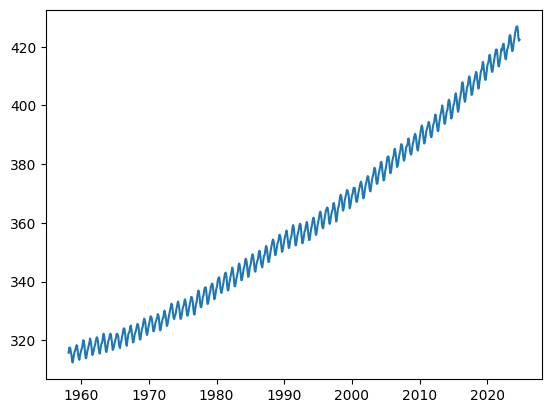

In [ ]:
plt.plot(df["average"])

In [ ]:
adfuller(df) # 1.0이 나옴. p-value가 너무 큼.

(6.254507024696706,
 1.0,
 21,
 778,
 {'1%': -3.438783171038672,
  '5%': -2.865262118650577,
  '10%': -2.568752018688748},
 567.0697141206242)

- KPSS test

- 귀무가설 :stationary하다.

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
kpss(df)

<ipython-input-83-4b8f3eadb646>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(df)


(4.242437275189363,
 0.01,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
# p-value가 0.01이라서 reject -> 귀무가설이 스테이셔너리하다라서 넌스테이셔너리라는 결론

- ADF test p-value = 1.0 > 0.05
  - 귀무가설을 accept

- KPSS test p-value - 0.01 < 0.05
  - null hypothesis reject

=> non stationary

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

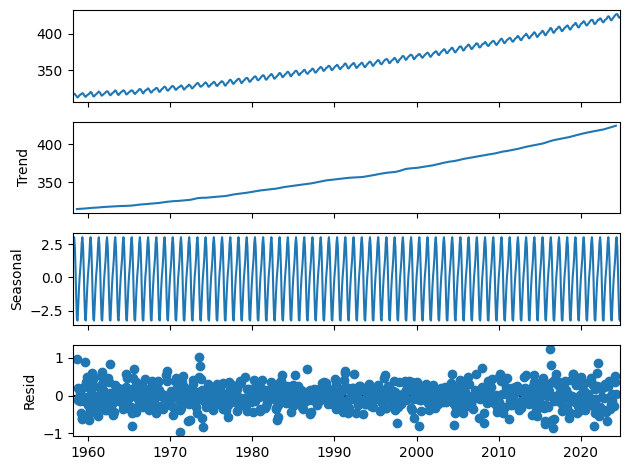

In [ ]:
result = seasonal_decompose(df, model = "additive")
result.plot()
plt.show()

올라가는 트렌드

시즈널은 심하다

일단 분석을 할 수 있도록 stationary로 바꾼다. difference로 이번엔 using scikittime

In [ ]:
from sktime.transformations.series.difference import Differencer

In [ ]:
transformer = Differencer(lags = 1)
df["average"] = transformer.fit_transform(df["average"])

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df.head()

,average
date,
1958-03-01,0.00
1958-04-01,1.74
1958-05-01,0.06
1958-06-01,-0.24
1958-07-01,-1.40


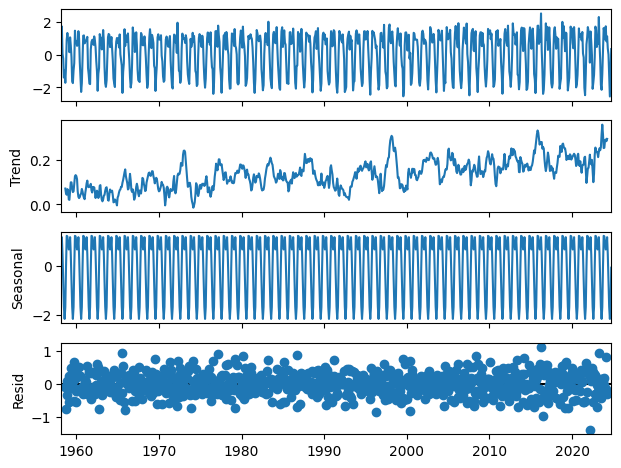

In [ ]:
result_diff = seasonal_decompose(df, model = "additive")
result_diff.plot()
plt.show()
# stationary한 느낌이 있다
# residual도 0에서 가깝다.

AR auto relation

auto co-relation : 나와 어제의 나를 비교

이걸 해보겠다


In [ ]:
from pandas.plotting import autocorrelation_plot

In [ ]:
df.shape # df's size is 800

(800, 1)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

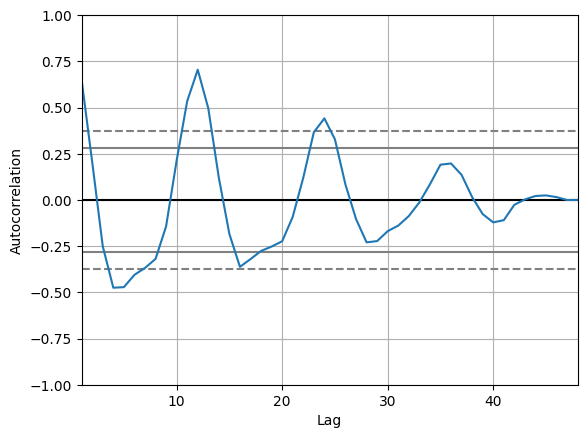

In [ ]:
autocorrelation_plot(df[:48]) # 너무 많아서 4년. 48개월

실선은 critical value

significant correlation은 점선 바깥으로 나간 선

첫번째 꼭지 12 두번째 24개월 lag

0.3, -0.3 범위 밖(significant한 것)은 12개월일 때, 24개월일 때 양(+)으로 영향을 미치고, 6개월일 때 음(-)(negative)의 영향을 미친다.


- critical range $(-0.3, 0.3)$

- 48개의 time unit(개월), 12th. 24th lag에서 통계적으로 유의미한 양(+)의 상관관계

- 6th~9th lag : 통계적으로 유의미한 음(-)의 약한 상관관계 (weakly negative correlation)

약간 연간으로 미침(12개월 주기) seasonality 가 보인다?
순차적으로 주기 변수를 바꿔가며 영향을 어떻게 미쳤나 본다.